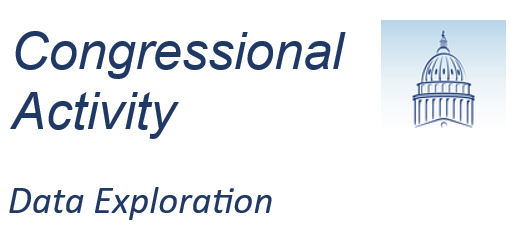
***  
# Introduction  
Since 1947, a summary of each Congressional session has been included in the Congressional Record, under the title Resume of Congressional Activity. The resume includes statistics on the number of measures introduced, bills passed, outcome of confirmations, etc.

The objective of this project is to create a dataset from published Resumes of Congressional Activity for analysis.

For this project, Resumes of Congressional Activity were downloaded in PDF form from <a href="https://www.senate.gov/">Senate.gov</a> and <a href="https://govinfo.gov">GovInfo.com</a>. Resumes from the 98th though 117th Congresses are included in this porject.

Additional information regarding the Resume of Congressional activity can be found at <a href="https://www.congress.gov/help/congressional-record">congress.gov</a>.

***
# Notebook Setup
***

In [199]:
# Import libraries
import re
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mpt
import seaborn as sns

In [3]:
# This notebook requires openpyxl. If you do not have this installed, uncomment the following install command
#!pip install openpyxl

In [4]:
# Set defaults
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['figure.figsize'] = [12, 4]

***  
# Read Data and Preview
***

In [5]:
# Read in all worksheets, dividing the data into general legislative activity and confirmation related activity
file_name = '../Data/Resume Data - Scrubbed.xlsx'
gen_activity_df = pd.read_excel(file_name, sheet_name='General Activity')
confirm_df = pd.read_excel(file_name, sheet_name='Confirmations')

In [6]:
# Preview the General Activity dataframe
gen_activity_df.head()

,Year,Congress,Session,Chamber,Bills not signed,Bills through conference,Bills vetoed,Conference reports,Extension of remarks,Pages of proceedings,...,"Measures reported, Senate joint resolutions","Measures reported, Simple resolutions",Private bills enacted into law,Public bills enacted into law,Quorum calls,Recorded votes,Special reports,Time in session,Vetoes overridden,Yea-and-nay votes
0,1983,98,1,Senate,0,4,3,4,0,17224,...,87,139,0,101,18,0,25,1010,1,381
1,1984,98,2,Senate,0,22,8,0,0,14650,...,99,122,17,166,19,0,11,940,1,292
2,1985,99,1,Senate,0,8,0,2,0,18418,...,118,100,0,110,20,0,18,1252,1,381
3,1986,99,2,Senate,0,0,4,0,0,17426,...,111,63,7,187,16,0,15,1278,1,359
4,1987,100,1,Senate,0,0,1,1,0,18660,...,72,62,2,96,36,0,28,1214,2,420


In [78]:
# Preview the Confirmation dataframe
confirm_df.head()

,Year,Congress,Session,"Air Force, nominations","Air Force, nominations, carryover","Air Force, confirmed","Air Force, failed","Air Force, returned","Air Force, unconfirmed","Air Force, withdrawn",...,"Space Force, withdrawn","Total, failed","Total, returned","Total, confirmed","Total, recess reappointment","Total, rejected","Total, unconfirmed","Total, withdrawn","Total, nominations","Total, nominations, carryover"
0,1983,98,1,12819,0,12792,1,0,26,0,...,0,477,0,55536,0,0,26,2,56041,0
1,1984,98,2,11818,26,11844,0,0,0,0,...,0,0,0,41726,17,0,107,2,41826,26
2,1985,99,1,21367,0,19013,0,0,2354,0,...,0,34,0,55918,6,0,3677,8,59643,0
3,1986,99,2,12246,2354,14600,0,0,0,0,...,0,0,0,39893,0,0,70,8,36294,3677
4,1987,100,1,18667,0,15711,0,1,2955,0,...,0,0,20,46404,0,1,5494,10,51929,0


***  
# Dataset Features

***

In [77]:
# Review the features of the general activity dataset
gen_activity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 41 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Year                                              120 non-null    int64 
 1   Congress                                          120 non-null    int64 
 2   Session                                           120 non-null    int64 
 3   Chamber                                           120 non-null    object
 4   Bills not signed                                  120 non-null    int64 
 5   Bills through conference                          120 non-null    int64 
 6   Bills vetoed                                      120 non-null    int64 
 7   Conference reports                                120 non-null    int64 
 8   Extension of remarks                              120 non-null    int64 
 9   Pages of proceedings            

In [80]:
# Review the features of the confirmation dataset
confirm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 52 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Year                                  40 non-null     int64
 1   Congress                              40 non-null     int64
 2   Session                               40 non-null     int64
 3   Air Force, nominations                40 non-null     int64
 4   Air Force, nominations, carryover     40 non-null     int64
 5   Air Force, confirmed                  40 non-null     int64
 6   Air Force, failed                     40 non-null     int64
 7   Air Force, returned                   40 non-null     int64
 8   Air Force, unconfirmed                40 non-null     int64
 9   Air Force, withdrawn                  40 non-null     int64
 10  Army, nominations                     40 non-null     int64
 11  Army, nominations, carryover          40 non-nu

***
# General Statistics
Since our data has already been prepped and validated, we can jump right into the analysis
***

In [81]:
# Let's review the statistics for the general activity dataset
gen_activity_df[gen_activity_df.columns[~gen_activity_df.columns.isin(['Year','Congress', 'Session', 'Chamber'])]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Bills not signed,120.0,0.016667,0.128556,0.0,0.00,0.0,0.00,1.0
Bills through conference,120.0,2.050000,7.832114,0.0,0.00,0.0,0.00,52.0
Bills vetoed,120.0,2.375000,4.109964,0.0,0.00,0.0,3.00,21.0
Conference reports,120.0,7.008333,13.211591,0.0,0.00,0.0,4.00,56.0
Extension of remarks,120.0,1071.625000,1528.214029,0.0,0.00,0.0,2223.75,5985.0
Pages of proceedings,120.0,11309.666667,8510.161821,0.0,7503.50,11029.5,15287.25,35003.0
Days in session,120.0,101.508333,74.518059,0.0,0.00,134.5,159.00,211.0
"Measures introduced, total",120.0,3965.950000,2254.991121,0.0,2348.50,3502.5,5150.50,11304.0
"Measures introduced, Bills",120.0,1633.933333,1522.606157,0.0,0.00,1637.5,2301.25,6343.0
"Measures introduced, Concurrent resolutions",120.0,72.675000,84.121977,0.0,0.00,50.0,98.25,348.0


In [82]:
# Let's review the statistics for the general activity dataset
confirm_df[confirm_df.columns[~confirm_df.columns.isin(['Year','Congress', 'Session'])]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
"Air Force, nominations",40.0,8799.875,4100.345377,4424.0,6048.25,6654.0,11520.25,21367.0
"Air Force, nominations, carryover",40.0,384.425,1090.259882,0.0,0.00,0.0,26.25,4952.0
"Air Force, confirmed",40.0,8639.500,3689.407346,4200.0,5918.50,6739.0,11401.00,19013.0
"Air Force, failed",40.0,0.025,0.158114,0.0,0.00,0.0,0.00,1.0
"Air Force, returned",40.0,109.750,610.975502,0.0,0.00,0.0,6.25,3870.0
"Air Force, unconfirmed",40.0,435.850,1116.104594,0.0,0.00,5.0,56.50,4952.0
"Air Force, withdrawn",40.0,0.425,0.780779,0.0,0.00,0.0,1.00,3.0
"Army, nominations",40.0,8785.825,3488.526740,4150.0,6345.25,7247.0,10675.25,17754.0
"Army, nominations, carryover",40.0,376.000,761.155431,0.0,0.00,0.0,108.00,2441.0
"Army, confirmed",40.0,8458.900,3533.536514,237.0,6205.00,6846.5,11079.00,15312.0


*** 
# Measures of Productivity
***

In [85]:
# We'll look at measures of productivity by Congress, so let's build a summary dataframe that groups data by Congress
# We'll start with the general activity dataset
gen_congress_df = gen_activity_df[gen_activity_df['Chamber'] != 'Both'].copy()
gen_congress_df.drop(columns=['Year', 'Session', 'Chamber'], inplace=True)
gen_congress_df = gen_congress_df.groupby('Congress').sum()
gen_congress_df.head()

,Bills not signed,Bills through conference,Bills vetoed,Conference reports,Extension of remarks,Pages of proceedings,Days in session,"Measures introduced, total","Measures introduced, Bills","Measures introduced, Concurrent resolutions",...,"Measures reported, Senate joint resolutions","Measures reported, Simple resolutions",Private bills enacted into law,Public bills enacted into law,Quorum calls,Recorded votes,Special reports,Time in session,Vetoes overridden,Yea-and-nay votes
Congress,,,,,,,,,,,,,,,,,,,,,
98,0,85,24,90,0,54832,547,12201,9537,534,...,188,498,52,623,127,382,135,3653,4,1197
99,0,27,20,71,0,60836,594,11602,8697,594,...,234,352,24,664,116,411,172,4324,4,1219
100,0,0,19,66,0,60425,605,11282,8515,567,...,162,302,48,713,99,397,182,3998,6,1341
101,0,49,21,87,7870,58487,555,11795,9258,560,...,157,252,16,650,51,381,132,3940,4,1135
102,1,0,24,87,3332,61871,564,12016,9604,527,...,74,266,20,590,39,392,105,4085,3,1059


In [87]:
# Now for the confirmation dataset
conf_congress_df = confirm_df.drop(columns=['Year', 'Session']).copy()
conf_congress_df = conf_congress_df.groupby('Congress').sum()
conf_congress_df.head()

,"Air Force, nominations","Air Force, nominations, carryover","Air Force, confirmed","Air Force, failed","Air Force, returned","Air Force, unconfirmed","Air Force, withdrawn","Army, nominations","Army, nominations, carryover","Army, confirmed",...,"Space Force, withdrawn","Total, failed","Total, returned","Total, confirmed","Total, recess reappointment","Total, rejected","Total, unconfirmed","Total, withdrawn","Total, nominations","Total, nominations, carryover"
Congress,,,,,,,,,,,,,,,,,,,,,
98,24637,26,24636,1,0,26,0,28815,0,28813,...,0,477,0,97262,17,0,133,4,97867,26
99,33613,2354,33613,0,0,2354,0,25288,892,25288,...,0,34,0,95811,6,0,3747,16,95937,3677
100,31016,2955,31015,0,1,2955,0,24948,2361,24944,...,0,0,20,88721,0,1,5922,23,89193,5494
101,24794,27,22816,0,0,2004,1,32806,2441,29879,...,0,52,0,88078,0,1,7951,48,93368,2762
102,20485,26,20478,0,0,29,4,24338,37,24330,...,0,10,0,75799,0,0,756,24,76446,167


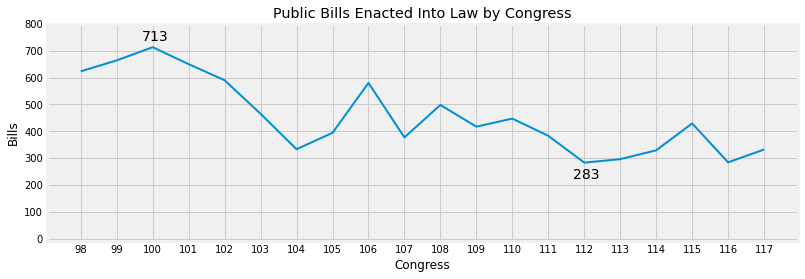

In [183]:
# Congresses with the most and least Public bills enacted into law
print()
fig, ax = plt.subplots()
gen_congress_df[['Public bills enacted into law']].plot(ax=ax, legend=False)
ax.set_title('Public Bills Enacted Into Law by Congress')
ax.set_xlabel(xlabel='Congress')
ax.set_ylabel(ylabel='Bills')
ax.set_ylim(bottom=-10, top=800)
max_cong = gen_congress_df['Public bills enacted into law'].idxmax()
max_label = gen_congress_df.loc[max_cong, ['Public bills enacted into law']][0]
min_cong = gen_congress_df['Public bills enacted into law'].idxmin()
min_label = gen_congress_df.loc[min_cong, ['Public bills enacted into law']][0]
ax.text(max_cong-0.3, max_label+25, int(max_label), size=14)
ax.text(min_cong-0.3, min_label-60, int(min_label), size=14)
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
plt.xticks(gen_congress_df.index)
plt.show()

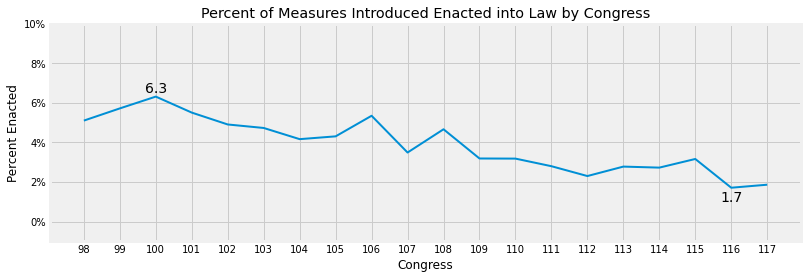

In [193]:
# Congresses with the most and least bills enacted into law, as a percent of measures introduced
print()
fig, ax = plt.subplots()
gen_congress_df['Percent, bills passed'] = gen_congress_df['Public bills enacted into law'] / gen_congress_df['Measures introduced, total'] * 100
gen_congress_df[['Percent, bills passed']].plot(ax=ax, legend=False)
ax.set_title('Percent of Measures Introduced Enacted into Law by Congress')
ax.set_xlabel(xlabel='Congress')
ax.set_ylabel(ylabel='Percent Enacted')
ax.set_ylim(bottom=-1, top=10)
max_cong = gen_congress_df['Percent, bills passed'].idxmax()
max_label = gen_congress_df.loc[max_cong, ['Percent, bills passed']][0]
min_cong = gen_congress_df['Percent, bills passed'].idxmin()
min_label = gen_congress_df.loc[min_cong, ['Percent, bills passed']][0]
ax.text(max_cong-0.3, max_label+0.2, round(max_label, 1), size=14)
ax.text(min_cong-0.3, min_label-0.7, round(min_label, 1), size=14)
ax.yaxis.set_major_formatter(mpt.PercentFormatter(decimals=0))
plt.xticks(gen_congress_df.index)
plt.show()

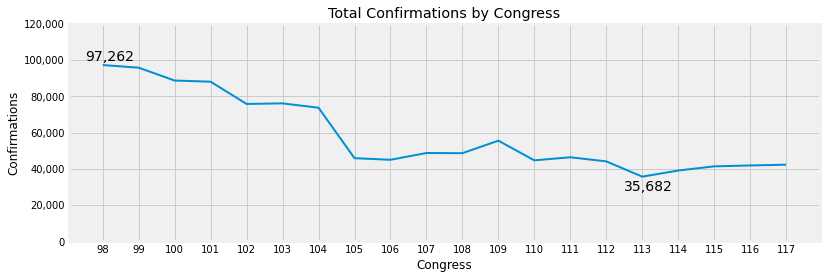

In [185]:
# Congresses with the most and least confirmations
print()
fig, ax = plt.subplots()
conf_congress_df[['Total, confirmed']].plot(ax=ax, legend=False)
ax.set_title('Total Confirmations by Congress')
ax.set_xlabel(xlabel='Congress')
ax.set_ylabel(ylabel='Confirmations')
ax.set_ylim(bottom=0, top=120000)
max_cong = conf_congress_df['Total, confirmed'].idxmax()
max_label = conf_congress_df.loc[max_cong, ['Total, confirmed']][0]
min_cong = conf_congress_df['Total, confirmed'].idxmin()
min_label = conf_congress_df.loc[min_cong, ['Total, confirmed']][0]
ax.text(max_cong-0.5, max_label+2500, format(int(max_label), ','), size=14)
ax.text(min_cong-0.5, min_label-7500, format(int(min_label), ','), size=14)
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(conf_congress_df.index)
plt.show()

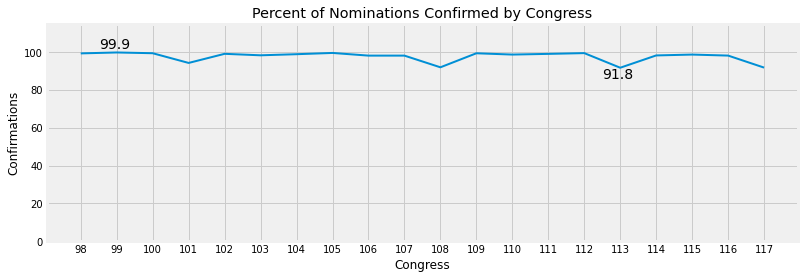

In [186]:
# Congresses with the most and least confirmations, as a percent of nominations
print()
fig, ax = plt.subplots()
conf_congress_df['Percent, confirmed'] = conf_congress_df['Total, confirmed'] / conf_congress_df['Total, nominations'] * 100
conf_congress_df[['Percent, confirmed']].plot(ax=ax, legend=False)
ax.set_title('Percent of Nominations Confirmed by Congress')
ax.set_xlabel(xlabel='Congress')
ax.set_ylabel(ylabel='Confirmations')
ax.set_ylim(bottom=0, top=115)
max_cong = conf_congress_df['Percent, confirmed'].idxmax()
max_label = conf_congress_df.loc[max_cong, ['Percent, confirmed']][0]
min_cong = conf_congress_df['Percent, confirmed'].idxmin()
min_label = conf_congress_df.loc[min_cong, ['Percent, confirmed']][0]
ax.text(max_cong-0.5, max_label+2, round(max_label, 1), size=14)
ax.text(min_cong-0.5, min_label-6, round(min_label, 1), size=14)
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
plt.xticks(conf_congress_df.index)
plt.show()

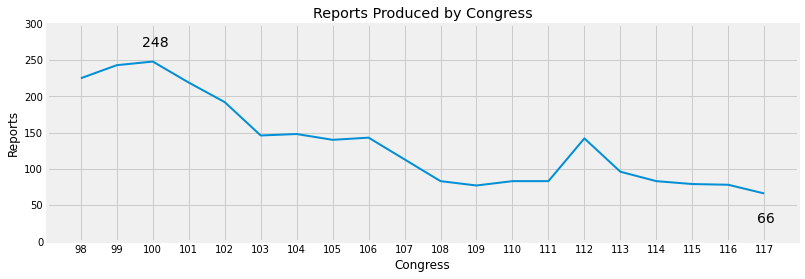

In [161]:
# Congresses with the most and least reports produced
print()
fig, ax = plt.subplots()
gen_congress_df['Total, all reports'] = gen_congress_df['Special reports'] + gen_congress_df['Conference reports']
gen_congress_df[['Total, all reports']].plot(ax=ax, legend=False)
ax.set_title('Reports Produced by Congress')
ax.set_xlabel(xlabel='Congress')
ax.set_ylabel(ylabel='Reports')
ax.set_ylim(bottom=-0, top=300)
max_cong = gen_congress_df['Total, all reports'].idxmax()
max_label = gen_congress_df.loc[max_cong, ['Total, all reports']][0]
min_cong = gen_congress_df['Total, all reports'].idxmin()
min_label = gen_congress_df.loc[min_cong, ['Total, all reports']][0]
ax.text(max_cong-0.3, max_label+20, int(max_label), size=14)
ax.text(min_cong-0.2, min_label-40, int(min_label), size=14)
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
plt.xticks(gen_congress_df.index)
plt.show()

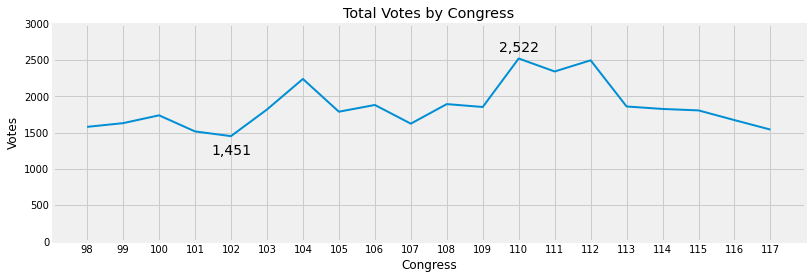

In [194]:
# Congresses with the most and least votes
print()
fig, ax = plt.subplots()
gen_congress_df['Total, all votes'] = gen_congress_df['Recorded votes'] + gen_congress_df['Yea-and-nay votes']
gen_congress_df[['Total, all votes']].plot(ax=ax, legend=False)
ax.set_title('Total Votes by Congress')
ax.set_xlabel(xlabel='Congress')
ax.set_ylabel(ylabel='Votes')
ax.set_ylim(bottom=0, top=3000)
max_cong = gen_congress_df['Total, all votes'].idxmax()
max_label = gen_congress_df.loc[max_cong, ['Total, all votes']][0]
min_cong = gen_congress_df['Total, all votes'].idxmin()
min_label = gen_congress_df.loc[min_cong, ['Total, all votes']][0]
ax.text(max_cong-0.55, max_label+100, format(int(max_label), ','), size=14)
ax.text(min_cong-0.55, min_label-250, format(int(min_label), ','), size=14)
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
plt.xticks(gen_congress_df.index)
plt.show()

*** 
# Correlation Analysis
***

In [221]:
corr_values = gen_congress_df.corr()['Public bills enacted into law'].sort_values()
print('Highest Negative Correlation:')
display(corr_values.head())
print('\nHighest Positive Correlation:')
print(corr_values[:-1].tail())

Highest Negative Correlation:


Measures pending on calendar              -0.641020
Days in session                           -0.464684
Measures introduced, Simple resolutions   -0.454940
Total, all votes                          -0.417479
Recorded votes                            -0.404651
Name: Public bills enacted into law, dtype: float64


Highest Positive Correlation:
Measures passed, Senate joint resolutions    0.836097
Measures introduced, Joint resolutions       0.837402
Measures reported, total                     0.851999
Measures passed, House joint resolutions     0.893502
Percent, bills passed                        0.906399
Name: Public bills enacted into law, dtype: float64


<AxesSubplot: >

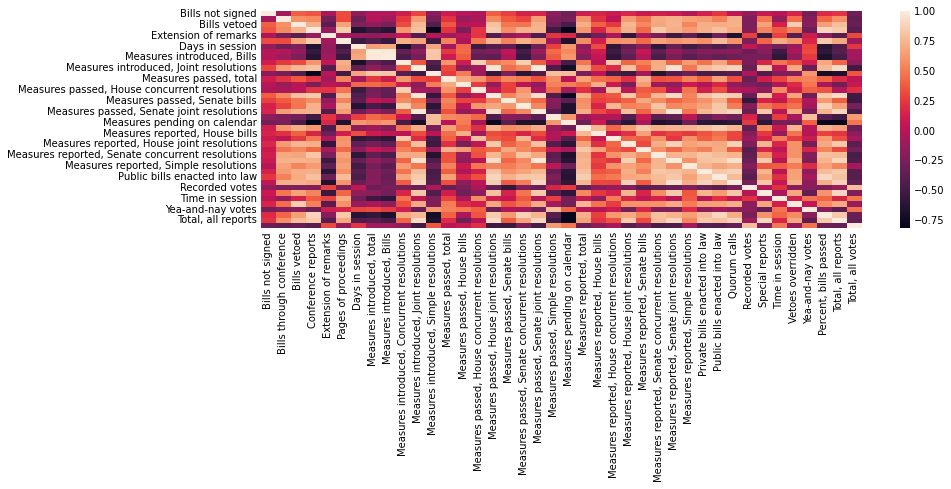

In [201]:
# Does Time in Session predict legislative activities?
sns.heatmap(gen_congress_df.corr())

***
**End**
***